# Imports 

# Conditions

| Model               | FiveVTS | Chickenpox | Pedalme | Wikimath | Windmillsmall | MontevideoBus |
|---------------------|---------|------------|---------|----------|---------------|---------------|
| Max iter.           | 30      | 30         | 30      | 30       | 30            | 30            |
| Epochs              | 50      | 50         | 50      | 50       | 50            | 50            |
| Lags                | 2       | 4          | 4       | 8        | 8             | 4             |
| Interpolation       | linear  | linear     | nearest | linear   | linear        | nearest       |
| Filters             |         |            |         |          |               |               |
| GConvGRU            | 12      | 16         | 12      | 12       | 12            | 12            |
| GConvLSTM           | 12      | 32         | 2       | 64       | 16            | 12            |
| GCLSTM              | 4       | 16         | 4       | 64       | 16            | 12            |
| LRGCN               | 4       | 8          | 8       | 32       | 12            | 2             |
| DyGrEncoder         | 12      | 12         | 12      | 12       | 12            | 12            |
| EvolveGCNH          | No need | No need    | No need | No need  | No need       | No need       |
| EvolveGCNO          | No need | No need    | No need | No need  | No need       | No need       |
| TGCN                | 12      | 12         | 12      | 12       | 12            | 8             |
| DCRNN               | 2       | 16         | 8       | 12       | 4             | 12            |


# Import

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import pickle

import plotly.io as pio

In [2]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# Data & 사용자정의함수

In [3]:
df_dataset = pd.DataFrame({
    'dataset':['fivenodes','chickenpox','pedalme','wikimath','windmillsmall','monte'],
    'node':[5,20,15,1068,11,675],
    'time':[200,522,36,731,17472,744]
})
df = pd.read_csv('./Body_Results.csv').iloc[:,1:]\
.merge(df_dataset)\
.assign(method = lambda df: df['method'].map({'STGCN':'STGNN','IT-STGCN':'IT-STGNN'}))

In [4]:
df.head()

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model,node,time
0,fivenodes,STGNN,0.0,NaN,2,12.0,NaN,50.0,0.729374,80.985221,GConvGRU,5,200
1,fivenodes,STGNN,0.0,NaN,2,12.0,NaN,50.0,0.729082,80.891788,GConvGRU,5,200
2,fivenodes,IT-STGNN,0.0,NaN,2,12.0,NaN,50.0,0.731600,114.492592,GConvGRU,5,200
3,fivenodes,IT-STGNN,0.0,NaN,2,12.0,NaN,50.0,0.735026,115.544274,GConvGRU,5,200
4,fivenodes,STGNN,0.0,NaN,2,12.0,NaN,50.0,0.727182,102.783140,GConvGRU,5,200


In [5]:
df2 = df.assign(model = lambda df: df.model.apply(lambda x: '' if x == "GNAR" else x))\
.eval('model = method+model')\
.assign(model = lambda df: df.model.str.replace("STGNN",""))
df2.head()

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model,node,time
0,fivenodes,STGNN,0.0,NaN,2,12.0,NaN,50.0,0.729374,80.985221,GConvGRU,5,200
1,fivenodes,STGNN,0.0,NaN,2,12.0,NaN,50.0,0.729082,80.891788,GConvGRU,5,200
2,fivenodes,IT-STGNN,0.0,NaN,2,12.0,NaN,50.0,0.731600,114.492592,IT-GConvGRU,5,200
3,fivenodes,IT-STGNN,0.0,NaN,2,12.0,NaN,50.0,0.735026,115.544274,IT-GConvGRU,5,200
4,fivenodes,STGNN,0.0,NaN,2,12.0,NaN,50.0,0.727182,102.783140,GConvGRU,5,200


In [6]:
def show_experiment_spec(df):
    df_cols = ['method','mrate','mtype','lags','nof_filters','inter_method','epoch','model']
    for dataset in df.dataset.unique():
        print(f'dataset: {dataset}')
        for col in df_cols: 
            df_query = df[df['dataset'] == dataset]
            print(f'{col}: {df_query[col].unique().tolist()}')
        print('---')

`-` 데이터세트별 실험셋팅 

In [7]:
show_experiment_spec(df)

dataset: fivenodes
method: ['STGNN', 'IT-STGNN', nan]
mrate: [0.0, 0.7, 0.8, 0.3, 0.5, 0.6, 0.125]
mtype: [nan, 'rand', 'block']
lags: [2]
nof_filters: [12.0, 4.0, 2.0, nan]
inter_method: [nan, 'linear']
epoch: [50.0, nan]
model: ['GConvGRU', 'GConvLSTM', 'GCLSTM', 'DCRNN', 'LRGCN', 'TGCN', 'EvolveGCNO', 'DyGrEncoder', 'EvolveGCNH', 'GNAR']
---
dataset: chickenpox
method: ['STGNN', 'IT-STGNN', nan]
mrate: [0.0, 0.3, 0.8, 0.5, 0.6, 0.2877697841726618]
mtype: [nan, 'rand', 'block']
lags: [4]
nof_filters: [16.0, 32.0, 8.0, 12.0, nan]
inter_method: [nan, 'linear']
epoch: [50.0, nan]
model: ['GConvGRU', 'GConvLSTM', 'GCLSTM', 'DCRNN', 'LRGCN', 'TGCN', 'EvolveGCNO', 'DyGrEncoder', 'EvolveGCNH', 'GNAR']
---
dataset: pedalme
method: ['STGNN', 'IT-STGNN', nan]
mrate: [0.0, 0.3, 0.6, 0.5, 0.8, 0.2857142857142857]
mtype: [nan, 'rand', 'block']
lags: [4]
nof_filters: [12.0, 2.0, 4.0, 8.0, nan]
inter_method: [nan, 'nearest', 'linear']
epoch: [50.0, nan]
model: ['GConvGRU', 'GConvLSTM', 'GCLSTM', 'D

`-` 요약 

In [8]:
df_summary = df2.groupby(["method","dataset","mrate","model"]).agg({'mse':'mean'}).reset_index()\
.pivot_table(index=['model'],columns=['dataset'],values='mse')
df_summary

dataset,chickenpox,fivenodes,monte,pedalme,wikimath,windmillsmall
model,,,,,,
DCRNN,1.363376,1.253446,1.076230,1.380833,0.657926,1.109669
DyGrEncoder,1.394786,1.344759,1.216260,1.382424,0.615986,1.226737
EvolveGCNH,1.095934,1.195548,1.698181,1.262356,0.815505,1.102934
EvolveGCNO,1.108809,1.186119,1.899377,1.274168,0.768218,1.155712
GCLSTM,1.387697,1.239241,1.041865,1.298337,0.855066,1.183466
GConvGRU,1.413279,1.427002,1.156958,1.570961,0.627924,1.224359
GConvLSTM,1.463041,1.307044,1.033401,1.273160,0.926050,1.203743
IT-DCRNN,0.928737,1.237063,0.983930,1.253734,0.601082,1.029309
IT-DyGrEncoder,1.000579,1.192339,1.088884,1.260758,0.573470,1.033515


# 시각화1: MissingRate (본문)

In [9]:
big = df.query("mtype=='rand' or mtype.isna()").query("dataset == 'chickenpox'").query("model == 'GConvLSTM'")\
.sort_values(by='mrate')\
.assign(mrate_jittered = lambda df: np.array(df['mrate'])+np.random.randn(len(df['mrate']))*0.01)
small = big.groupby(["dataset","mrate","method"]).agg({'mse':'mean'}).reset_index().rename({'mse':'mse_mean'},axis=1)
tidydata = big.merge(small)
#---#
fig = px.scatter(
    tidydata,
    y='mse',
    x='mrate_jittered',
    opacity=0.0,
    color='method',
    width=850,
    height=500,
    hover_data='mrate'
)
_fig1 = px.scatter(
    tidydata,
    y='mse_mean',
    x='mrate',
    color='method',
)
_fig1.data[0]['mode']='markers+lines'
_fig1.data[0]['marker']['size'] = 10
_fig1.data[0]['line']['width'] = 3
_fig1.data[0]['line']['dash'] = 'dashdot'
_fig1.data[1]['mode']='markers+lines'
_fig1.data[1]['marker']['size'] = 10
_fig1.data[1]['line']['width'] = 3
_fig1.data[1]['line']['dash'] = 'dashdot'
_fig2 = px.box(
    tidydata.query("method=='STGCN'"),
    y='mse',
    x='mrate',
)
_fig2.data[0]['opacity']=0.9
_fig2.data[0]['marker']['color']='#636efa'
_fig3 = px.box(
    tidydata.query("method=='IT-STGCN'"),
    y='mse',
    x='mrate',
)
_fig3.data[0]['opacity']=0.9
_fig3.data[0]['marker']['color']='#EF553B'
_fig3
for g in _fig1.data:
    fig.add_trace(g)
for g in _fig2.data:
    fig.add_trace(g)
for g in _fig3.data:
    fig.add_trace(g)
fig.data[0]['showlegend'] =False
fig.data[1]['showlegend'] =False
fig.layout['xaxis']['title']['text']='Missign Rate'
fig.layout['yaxis']['title']['text']='MSE'
fig.layout['legend']['title']['text']=""
fig.layout['title']['text']='Chickenpox/GConvLSTM'
fig

# 시각화2: MissingRate (부록)

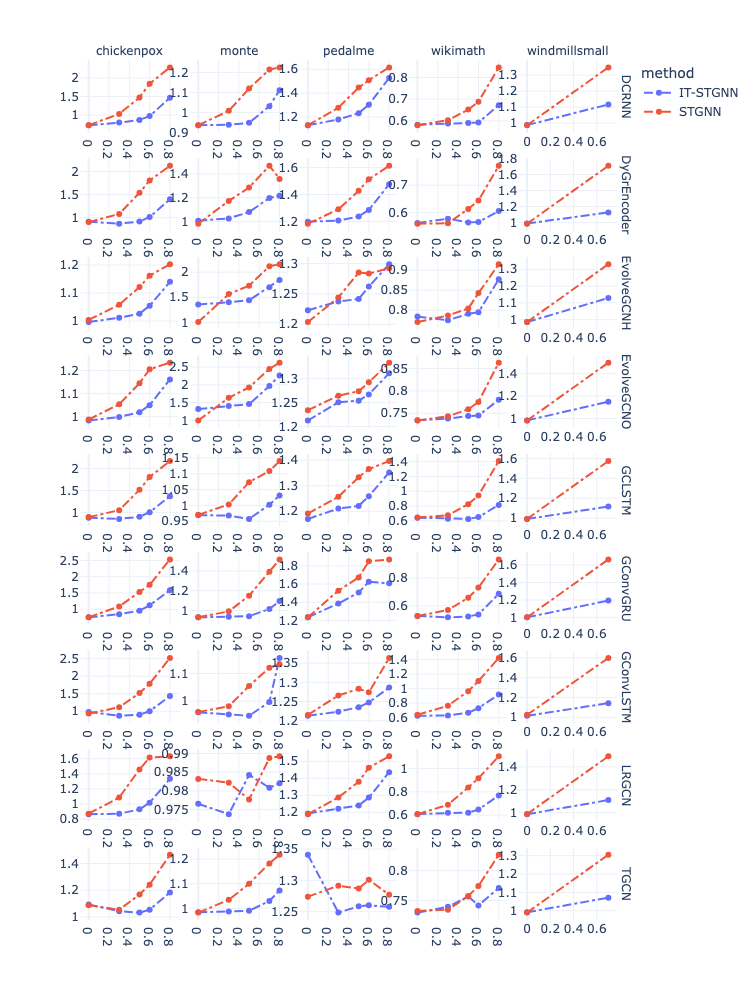

In [612]:
tidydata = df.query("mtype!='block'").query("dataset != 'fivenodes'")\
.groupby(["method","dataset","mrate","model"]).agg({'mse':'mean'}).reset_index()
#---#
fig = px.line(
    tidydata,
    x='mrate',
    y='mse',
    color='method',
    facet_row='model',
    facet_col='dataset',
    width=850,
    height=1000,
    
)
for scatter in fig.data:
    scatter['mode'] = 'lines+markers'
    scatter['line']['dash'] = 'dashdot'
for annotation in fig.layout['annotations']:
    annotation['text'] = annotation['text'].replace('dataset=','')
    annotation['text'] = annotation['text'].replace('model=','')
for k in [k for k in fig.layout if 'xaxis' in k]:
    fig.layout[k]['title']['text'] = None 
for k in [k for k in fig.layout if 'yaxis' in k]:
    fig.layout[k]['title']['text'] = None 
fig.update_yaxes(showticklabels=True,matches=None)
fig.update_xaxes(showticklabels=True,matches=None)

# 시각화3 

In [11]:
def func(x):
    if 'IT' in x:
        return 'IT-STGNN'
    elif 'GNAR' in x:
        return 'GNAR'
    else: 
        return 'STGNN'

In [12]:
tidydata = df2.query('mtype != "block"').groupby(["method","dataset","mrate","model"]).agg({'mse':'mean'}).reset_index()\
.pivot_table(index=['model'],columns=['dataset'],values='mse').stack().reset_index().rename({0:'mse'},axis=1).assign(
    method = lambda df: df['model'].apply(func)
)
tidydata = pd.concat([df.sort_values('mse').reset_index(drop=True).reset_index() for _,df in tidydata.groupby("dataset")])
#---#
fig = px.bar(
    tidydata,
    x='index',
    y='mse',
    color='method',
    facet_col='dataset',
    facet_col_wrap=2,
    text='model',
    height=800
)
fig

# 시각화4

In [13]:
df.query('mtype != "block"')\
.groupby(["method","dataset","node","time"]).agg({'mse':'mean'}).reset_index()\
.assign(ratio = lambda df: df['time']**2/df['node'])

,method,dataset,node,time,mse,ratio
0,IT-STGNN,chickenpox,20,522,1.027941,1.362420e+04
1,IT-STGNN,fivenodes,5,200,1.181604,8.000000e+03
2,IT-STGNN,monte,675,744,1.166283,8.200533e+02
3,IT-STGNN,pedalme,15,36,1.273419,8.640000e+01
4,IT-STGNN,wikimath,1068,731,0.681163,5.003380e+02
5,IT-STGNN,windmillsmall,11,17472,1.083182,2.775189e+07
6,STGNN,chickenpox,20,522,1.369838,1.362420e+04
7,STGNN,fivenodes,5,200,1.246767,8.000000e+03
8,STGNN,monte,675,744,1.312177,8.200533e+02
9,STGNN,pedalme,15,36,1.332290,8.640000e+01
